In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
import MySimulator

In [3]:
HeatTransfer = MySimulator.ClassHeatSimulation()

In [76]:
HeatTransfer.UpdatePropertiesTable()
HeatTransfer.PropsTable

,Node,R_Left,R_Right,R_Circum,ThermCap,C/(1/R)
0,1.0,7.073553,7.073553,848.826363,0.063543,0.223806
1,2.0,7.073553,7.073553,848.826363,0.063543,0.223806
2,3.0,7.073553,7.073553,848.826363,0.063543,0.223806
3,4.0,7.073553,2829.421211,1697.652726,0.031772,0.223250


In [109]:
NumberNodes = 4
HeatTransfer.SetMaterialProperties(7817,460,50)
HeatTransfer.SetDiameter(.003)
HeatTransfer.SetNodes(4,.01)
HeatTransfer.SetConvectionProperties(50,40)
HeatTransfer.EnableLateralHeatTransfer(True)
HeatTransfer.SetHeatSource(200)
HeatTransfer.SetInitalTemp(25)
HeatTransfer.UpdatePropertiesTable()
HeatTransfer.PropsTable

,Node,R_Left,R_Right,R_Circum,ThermCap,C/(1/R)
0,1.0,7.073553,7.073553,848.826363,0.063543,0.223806
1,2.0,7.073553,7.073553,848.826363,0.063543,0.223806
2,3.0,7.073553,7.073553,848.826363,0.063543,0.223806
3,4.0,7.073553,2829.421211,1697.652726,0.031772,0.223250


In [110]:
HeatTransfer.SuggestedTimeInc(True)

0.13

In [112]:
HeatTransfer.SetTimeIncrement(.10)

In [113]:
print(HeatTransfer.GetTempatureAtNodeAtTime(0,300,1))
HeatTransfer.AllTemp

3000


KeyboardInterrupt: 

Now on to the controller
For now time length is 10 min

In [118]:
def Logic(TempArray,HeatSourceTemp,Type):
    if Type == "BangBang":
        if (TempArray[NumberNodes + 1] > 100 + 5):
            HeatTransfer.TempLeftEnd = 25;
        elif (TempArray[NumberNodes + 1] <= 100 - 0):
            HeatTransfer.TempLeftEnd = 200;

In [142]:
Duration = 21
StepNumber = 0
TargetTemp = 45
HeatTransfer.TempLeftEnd = 200
HeatTransfer.SetHeatSource(200)

while StepNumber < Duration:
    Inc = 1
    StepNumber = StepNumber + Inc
    HeatTransfer.SetInitalTempProfile(HeatTransfer.Temps)
    HeatTransfer.GetTempatureAtNodeAtTime(StepNumber-Inc,StepNumber,4)
    Logic(HeatTransfer.Temps,HeatTransfer.TempLeftEnd,"BangBang")

10
10
Time Window Invalid, approximating
10
Time Window Invalid, approximating
10
Time Window Invalid, approximating
10
Time Window Invalid, approximating
10
Time Window Invalid, approximating
10
Time Window Invalid, approximating
10
Time Window Invalid, approximating
10
Time Window Invalid, approximating
10
Time Window Invalid, approximating
10
Time Window Invalid, approximating
10
Time Window Invalid, approximating
10
Time Window Invalid, approximating
10
Time Window Invalid, approximating
10
Time Window Invalid, approximating
10
Time Window Invalid, approximating
10
Time Window Invalid, approximating
10
Time Window Invalid, approximating
10
Time Window Invalid, approximating
10
10
Time Window Invalid, approximating


In [146]:
HeatTransfer.AllTemp

,Time,Heater,Node1,Node2,Node3,Node4,Convection
0,0.0,25.0,25.000000,25.000000,25.000000,25.000000,40.0
1,0.1,25.0,25.027810,25.027810,25.027810,25.044496,40.0
2,0.2,25.0,25.049381,25.055569,25.059281,25.081436,40.0
3,0.3,25.0,25.067490,25.082725,25.091084,25.115832,40.0
4,0.4,25.0,25.083549,25.108852,25.122372,25.148973,40.0
...,...,...,...,...,...,...,...
206,20.6,25.0,25.449134,25.777046,25.986499,26.079258,40.0
207,20.7,25.0,25.449142,25.777061,25.986518,26.079279,40.0
208,20.8,25.0,25.449150,25.777075,25.986536,26.079298,40.0
209,20.9,25.0,25.449157,25.777088,25.986554,26.079317,40.0


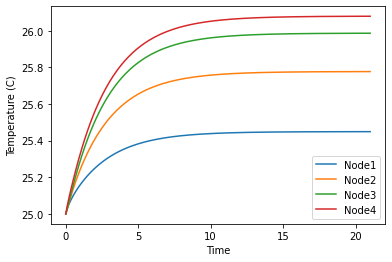

In [135]:
dfValidate4 = HeatTransfer.AllTemp
plt.figure()
plt.plot(dfValidate4.Time, dfValidate4.Node1, label="Node1")
plt.plot(dfValidate4.Time, dfValidate4.Node2, label="Node2")
plt.plot(dfValidate4.Time, dfValidate4.Node3, label="Node3")
plt.plot(dfValidate4.Time, dfValidate4.Node4, label="Node4")
#plt.plot(dfValidate4.Time, dfValidate4.HeatTransfer.TempLeftEnd, label="HeatSource")
#plt.plot(dfValidate4.Time, np.ones(np.shape(dfValidate4.Time))*40, label="Fluid")
plt.xlabel("Time")
plt.ylabel("Temperature (C)")
plt.legend()
plt.show()